# PREDIKSI DEPRESI MAHASISWA MENGGUNAKAN ALGORIRMA K-NEAREST NEIGHBOR (KNN)


Muhamad Rijki Nurjakiah (2306044)<br>
Mochamad Risyad Fauzan (2306038)<br>
Teknik Informatika b


## 1. Data Gathering


### Import library yang diperlukan


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt-
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, ShuffleSplit
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, auc

### Data Gathering: Memuat dataset yang diambil


In [ ]:
df = pd.read_csv ("/content/drive/MyDrive/prakai/dataset/Depression Student Dataset.csv")

In [ ]:
df.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No


## 2. Data Preprocessing


### Data Understanding


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 502 non-null    object 
 1   Age                                    502 non-null    int64  
 2   Academic Pressure                      502 non-null    float64
 3   Study Satisfaction                     502 non-null    float64
 4   Sleep Duration                         502 non-null    object 
 5   Dietary Habits                         502 non-null    object 
 6   Have you ever had suicidal thoughts ?  502 non-null    object 
 7   Study Hours                            502 non-null    int64  
 8   Financial Stress                       502 non-null    int64  
 9   Family History of Mental Illness       502 non-null    object 
 10  Depression                             502 non-null    object 
dtypes: flo

In [ ]:
df.columns

Index(['Gender', 'Age', 'Academic Pressure', 'Study Satisfaction',
       'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [ ]:
print(df.describe())

              Age  Academic Pressure  Study Satisfaction  Study Hours  \
count  502.000000         502.000000          502.000000   502.000000   
mean    26.241036           3.003984            3.075697     6.404382   
std      4.896501           1.390007            1.373490     3.742434   
min     18.000000           1.000000            1.000000     0.000000   
25%     22.000000           2.000000            2.000000     3.000000   
50%     26.500000           3.000000            3.000000     7.000000   
75%     30.000000           4.000000            4.000000    10.000000   
max     34.000000           5.000000            5.000000    12.000000   

       Financial Stress  
count        502.000000  
mean           2.928287  
std            1.425053  
min            1.000000  
25%            2.000000  
50%            3.000000  
75%            4.000000  
max            5.000000  


In [ ]:
print("Unique value of gender: ", df["Gender"].unique())
print("Unique value of Family History of Mental Illness status: ", df["Family History of Mental Illness"].unique())
print("Unique value of Depression status: ", df["Depression"].unique())

Unique value of gender:  ['Male' 'Female']
Unique value of Family History of Mental Illness status:  ['Yes' 'No']
Unique value of Depression status:  ['No' 'Yes']


In [ ]:
print(df["Gender"].value_counts())

Gender
Male      267
Female    235
Name: count, dtype: int64


In [ ]:
print(df["Depression"].value_counts())

Depression
Yes    252
No     250
Name: count, dtype: int64


In [ ]:
print(df["Family History of Mental Illness"].value_counts())

Family History of Mental Illness
No     265
Yes    237
Name: count, dtype: int64


In [ ]:
print(df.isnull().sum())

Gender                                   0
Age                                      0
Academic Pressure                        0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Study Hours                              0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


### 3. Exploratory Data Analysis (EDA)


#### Plot histogram untuk kolom numerik


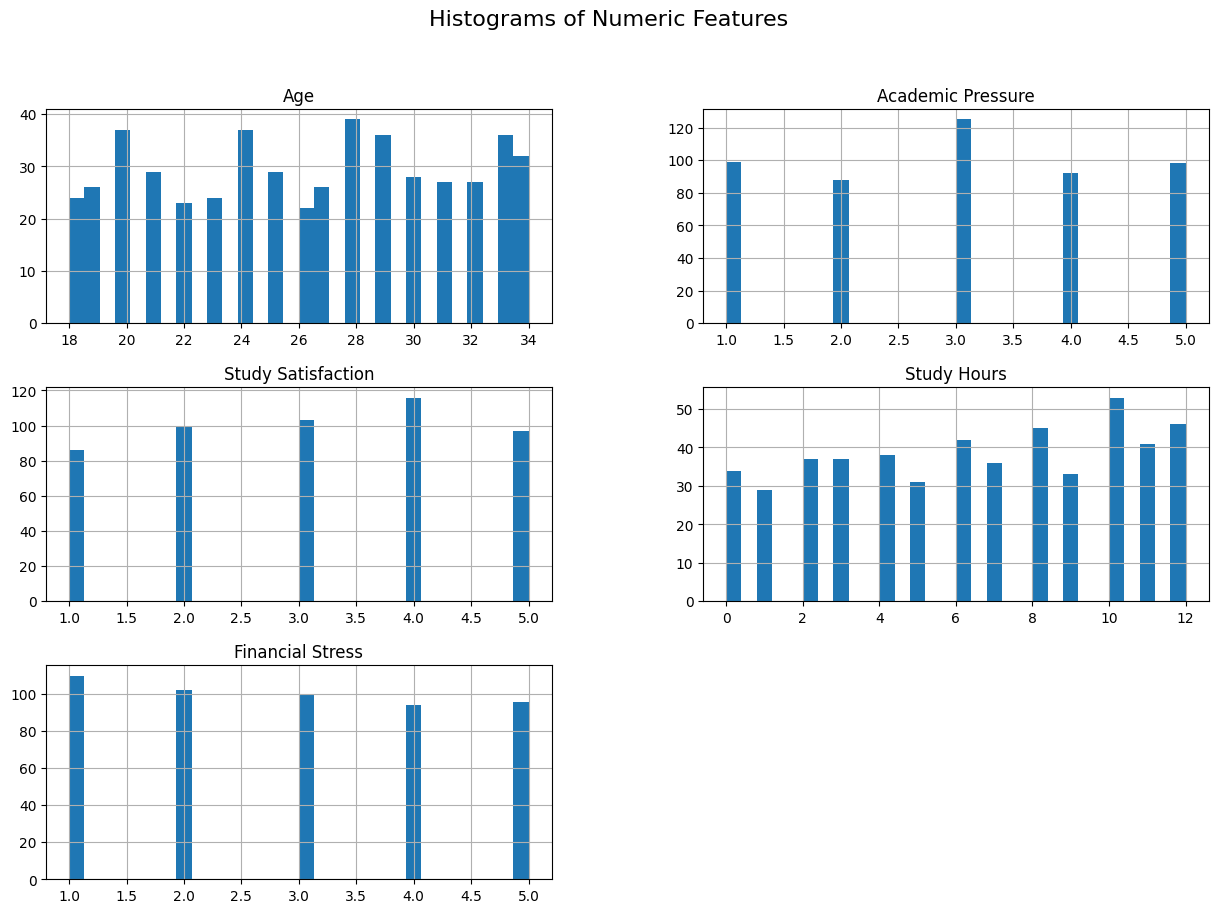

In [ ]:
numeric_cols = ['Age', 'Academic Pressure', 'Study Satisfaction', 'Study Hours', 'Financial Stress']
df[numeric_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()

#### Plot density untuk melihat distribusi data


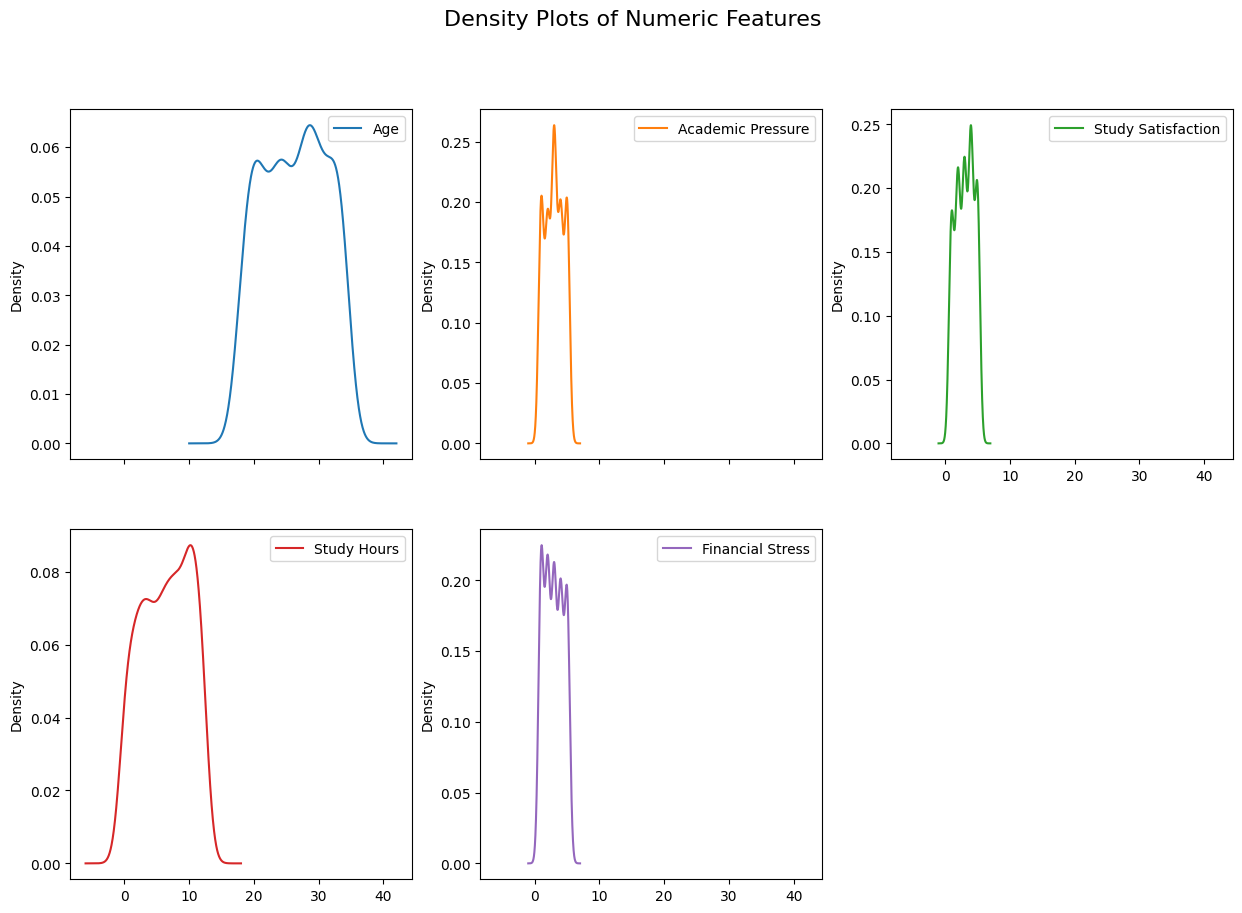

In [ ]:
df[numeric_cols].plot(kind="density", subplots=True, layout=(2, 3), figsize=(15, 10))
plt.suptitle("Density Plots of Numeric Features", fontsize=16)
plt.show()


### Korelasi fitur numerik

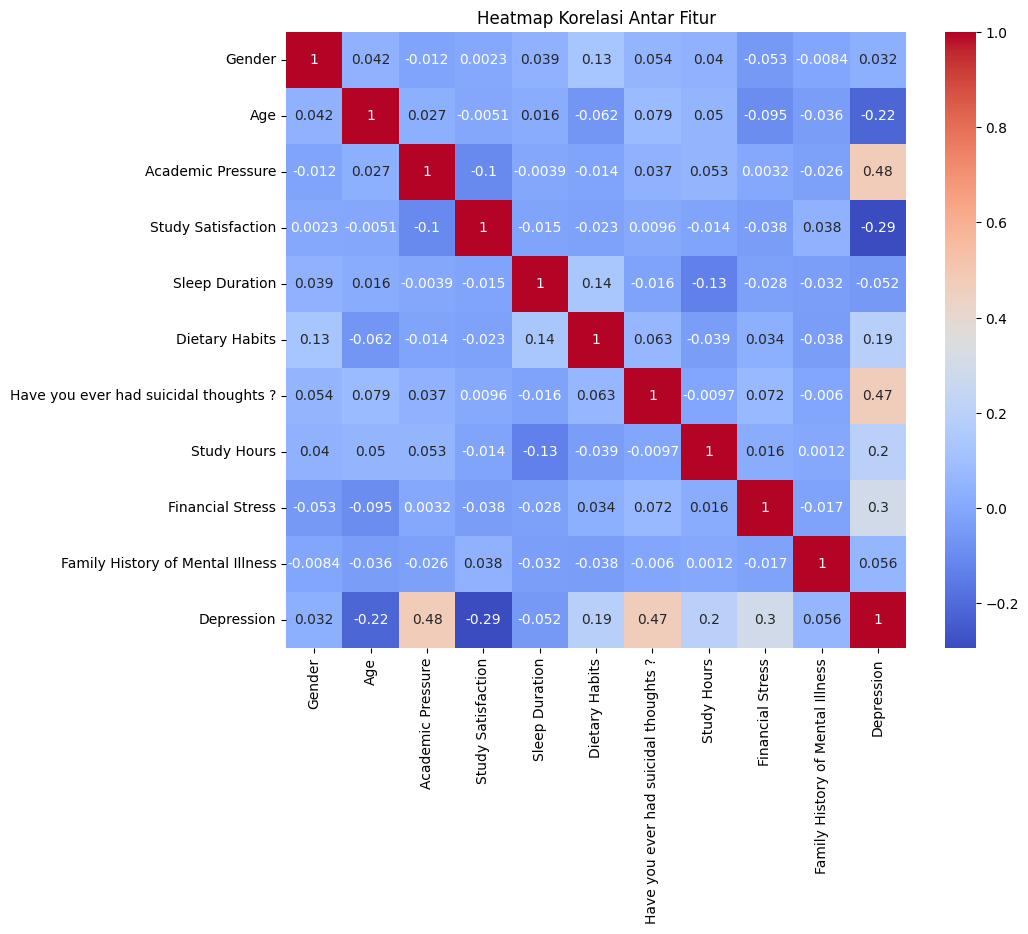

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

#### Missing Value Heatmap


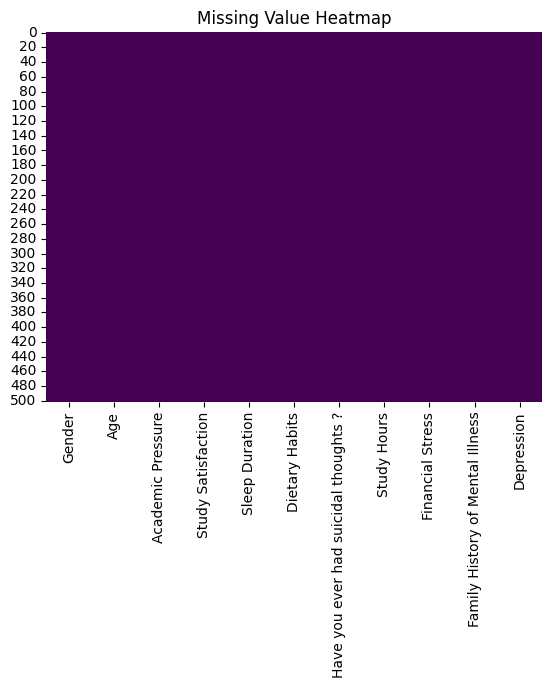

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Value Heatmap")
plt.show()

#### Deteksi Outlier Menggunakan Boxplot


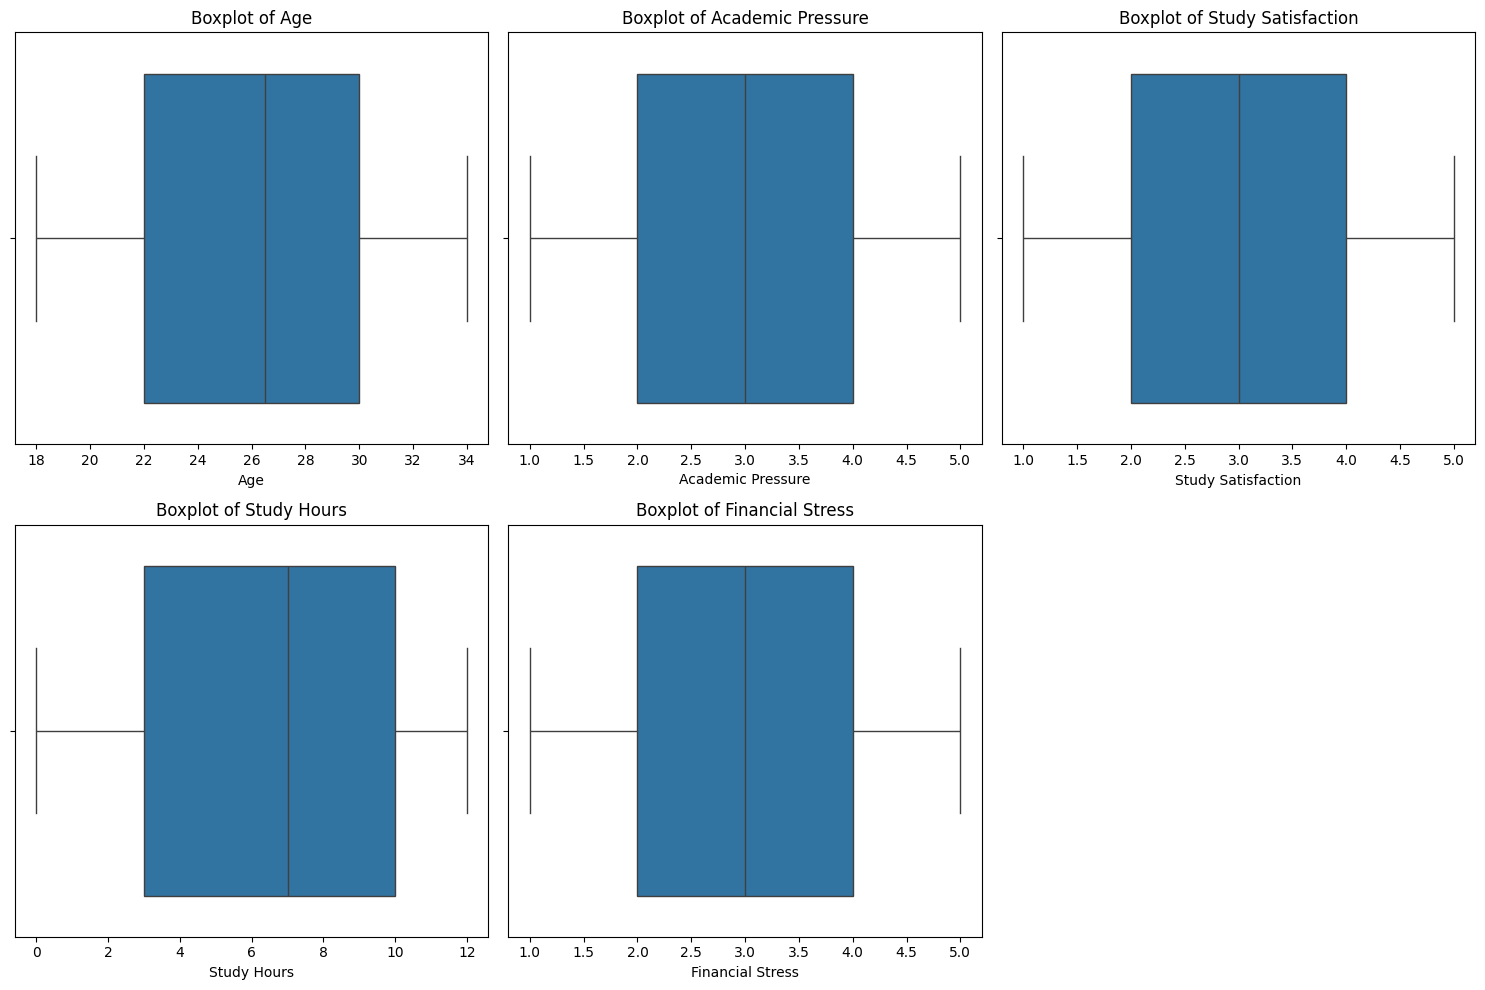

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


#### Visualisasi Data Kategorikal


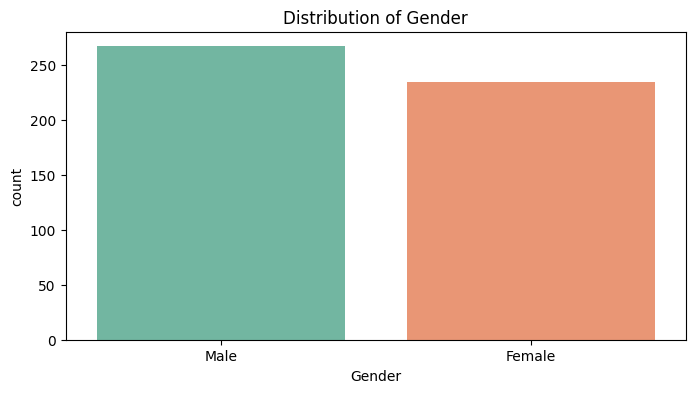

In [ ]:
# Bar plot untuk kolom 'Gender'
plt.figure(figsize=(8, 4))
sns.countplot(x="Gender", hue="Gender", data=df, palette="Set2")
plt.title("Distribution of Gender")
plt.show()

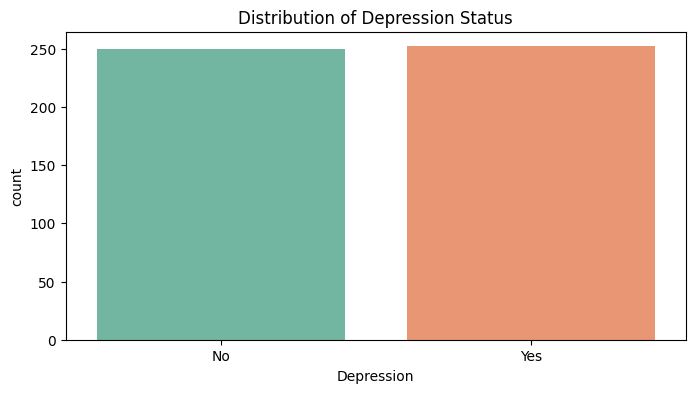

In [ ]:
# Bar plot untuk kolom 'Depresi'
plt.figure(figsize=(8, 4))
sns.countplot(x="Depression", hue="Depression", data=df, palette="Set2")
plt.title("Distribution of Depression Status")
plt.show()

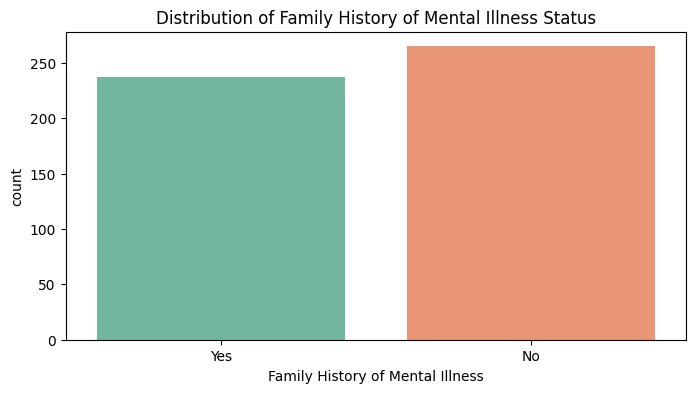

In [ ]:
#  visualisasi untuk kolom 'Family History of Mental Illness'
plt.figure(figsize=(8, 4))
sns.countplot(x="Family History of Mental Illness", hue="Family History of Mental Illness", data=df, palette="Set2")
plt.title("Distribution of Family History of Mental Illness Status")
plt.show()

### 4.  Data Preparation


In [ ]:
# Drop duplikat
df = df.drop_duplicates()

In [ ]:
# Drop missing values
df = df.dropna()

In [ ]:
# Encoding Data Kategorikal
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    if column != 'Depression':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

In [ ]:
# Encoding target
target_le = LabelEncoder()
df['Depression'] = target_le.fit_transform(df['Depression'])  # 0/1 encoding

In [ ]:
# Normalisasi / Standardisasi
X = df.drop('Depression', axis=1)
y = df['Depression']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### 5. Modeling

In [ ]:
# Modeling dengan KNN
knn = KNeighborsClassifier(n_neighbors=5, metric="euclidean", weights="distance")
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', weights='distance')

### Evaluasi model

In [ ]:
# Melakukan prediksi pada data testing
y_pred = knn.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Hasil Evaluasi Model KNN:")
print("Akurasi  :", accuracy)
print("Presisi  :", precision)
print("Recall   :", recall)
print("F1-Score :", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Hasil Evaluasi Model KNN:
Akurasi  : 0.900990099009901
Presisi  : 0.8909090909090909
Recall   : 0.9245283018867925
F1-Score : 0.9074074074074074

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89        48
           1       0.89      0.92      0.91        53

    accuracy                           0.90       101
   macro avg       0.90      0.90      0.90       101
weighted avg       0.90      0.90      0.90       101



Confusion Matrix (DataFrame):
                     Predicted: Non-Depresi  Predicted: Depresi
Actual: Non-Depresi                      42                   6
Actual: Depresi                           4                  49


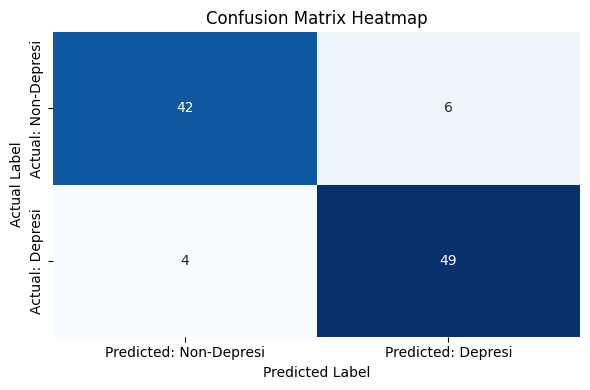

In [ ]:
# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Buat DataFrame confusion matrix untuk ditampilkan
cm_df = pd.DataFrame(
    cm,
    index=["Actual: Non-Depresi", "Actual: Depresi"],
    columns=["Predicted: Non-Depresi", "Predicted: Depresi"],
)

# Tampilkan confusion matrix sebagai DataFrame
print("Confusion Matrix (DataFrame):")
print(cm_df)

# Visualisasi confusion matrix menggunakan heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix Heatmap")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()


### Hyperparameter Tuning

In [ ]:
# Buat parameter grid untuk GridSearch
param_grid = {
    "n_neighbors": range(3, 22, 2),  # Menggunakan nilai ganjil untuk n_neighbors
    "weights": ["uniform", "distance"],
    "metric": [
        "euclidean",
        "manhattan",
        "minkowski",
    ],  # Pilihan metrik, bisa ditambahkan opsi lain jika perlu
}

# Inisialisasi GridSearchCV dengan 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=knn, param_grid=param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=1
)

# Lakukan pencarian grid pada data training (menggunakan fitur yang sudah di-balancing dan feature engineered)
grid_search.fit(X_train, y_train)

# Cetak parameter terbaik dan skor terbaik dari grid search
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Gunakan model terbaik untuk prediksi pada data testing
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test)

# Evaluasi model terbaik
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Test Set Accuracy with Best Parameters:", accuracy_best)
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

# Tampilkan confusion matrix dalam bentuk DataFrame
cm_best = confusion_matrix(y_test, y_pred_best)
cm_df_best = pd.DataFrame(
    cm_best,
    index=["Actual: Non-Depresi", "Actual: Depresi"],
    columns=["Predicted: Non-Depresi", "Predicted: Depresi"],
)
print("Confusion Matrix (Best Model):")
print(cm_df_best)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 21, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 0.8852777777777778
Test Set Accuracy with Best Parameters: 0.9306930693069307

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93        48
           1       0.93      0.94      0.93        53

    accuracy                           0.93       101
   macro avg       0.93      0.93      0.93       101
weighted avg       0.93      0.93      0.93       101

Confusion Matrix (Best Model):
                     Predicted: Non-Depresi  Predicted: Depresi
Actual: Non-Depresi                      44                   4
Actual: Depresi                           3                  50


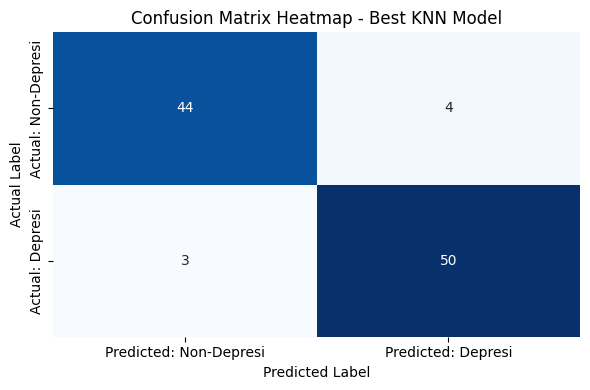

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df_best, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix Heatmap - Best KNN Model")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()

Hasil Grid Search dalam bentuk tabel:


,params,mean_test_score,std_test_score,rank_test_score
0,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.845370,0.030278,53
1,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.847840,0.031195,51
2,"{'metric': 'euclidean', 'n_neighbors': 5, 'wei...",0.852901,0.036416,43
3,"{'metric': 'euclidean', 'n_neighbors': 5, 'wei...",0.847870,0.036605,49
4,"{'metric': 'euclidean', 'n_neighbors': 7, 'wei...",0.857994,0.039296,37
5,"{'metric': 'euclidean', 'n_neighbors': 7, 'wei...",0.857963,0.035309,39
6,"{'metric': 'euclidean', 'n_neighbors': 9, 'wei...",0.852809,0.024531,47
7,"{'metric': 'euclidean', 'n_neighbors': 9, 'wei...",0.852809,0.024531,45
8,"{'metric': 'euclidean', 'n_neighbors': 11, 'we...",0.860309,0.018632,33
9,"{'metric': 'euclidean', 'n_neighbors': 11, 'we...",0.860309,0.014904,33


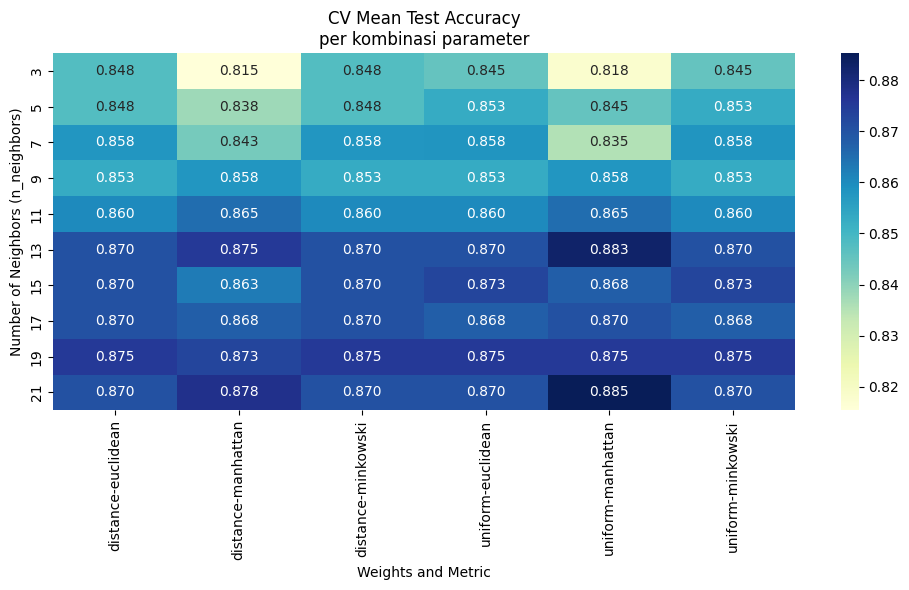

In [ ]:
# Ambil hasil dari grid search cv (cv_results_)
cv_results = pd.DataFrame(grid_search.cv_results_)
print("Hasil Grid Search dalam bentuk tabel:")
display(cv_results[["params", "mean_test_score", "std_test_score", "rank_test_score"]])

# Membuat pivot table untuk visualisasi
pivot_table = cv_results.pivot_table(
    index="param_n_neighbors",
    columns=["param_weights", "param_metric"],
    values="mean_test_score",
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("CV Mean Test Accuracy\nper kombinasi parameter")
plt.xlabel("Weights and Metric")
plt.ylabel("Number of Neighbors (n_neighbors)")
plt.tight_layout()
plt.show()


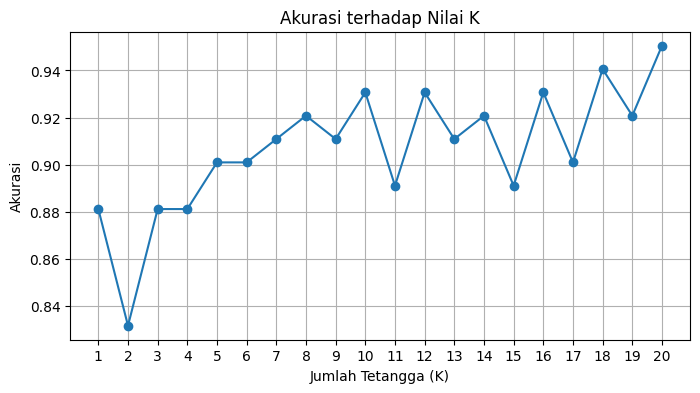

In [ ]:
#Eksplorasi nilai k
k_range = range(1, 21)
scores = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

plt.figure(figsize=(8,4))
plt.plot(k_range, scores, marker='o')
plt.xticks(k_range)
plt.title("Akurasi terhadap Nilai K")
plt.xlabel("Jumlah Tetangga (K)")
plt.ylabel("Akurasi")
plt.grid(True)
plt.show()

Kolom split test scores: ['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']
Pivot Table (Highest Test Accuracy):
param_weights      distance                       uniform                    
param_metric      euclidean manhattan minkowski euclidean manhattan minkowski
param_n_neighbors                                                            
3                  0.887500  0.839506  0.887500  0.887500  0.850000  0.887500
5                  0.912500  0.862500  0.912500  0.912500  0.864198  0.912500
7                  0.912500  0.876543  0.912500  0.912500  0.864198  0.912500
9                  0.876543  0.887500  0.876543  0.876543  0.887500  0.876543
11                 0.876543  0.913580  0.876543  0.887500  0.913580  0.887500
13                 0.912500  0.912500  0.912500  0.925000  0.912500  0.925000
15                 0.900000  0.925000  0.900000  0.912500  0.900000  0.912500
17                 0.888889  0.912500  0.888889  0.8

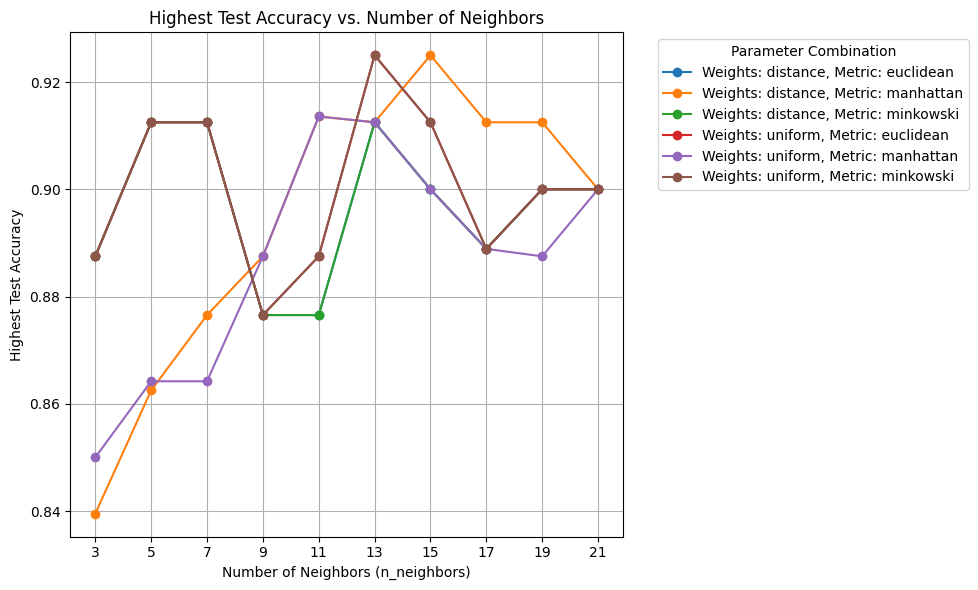

In [ ]:
# Ambil cv_results dari grid_search
cv_results = pd.DataFrame(grid_search.cv_results_)

# Tampilkan kolom-kolom split test score (misalnya, 'split0_test_score' hingga 'split4_test_score')
score_cols = [
    col for col in cv_results.columns if "split" in col and "test_score" in col
]
print("Kolom split test scores:", score_cols)

# Hitung highest test accuracy untuk setiap iterasi (baris) dengan mengambil nilai maksimum di antara split test scores
cv_results["max_test_score"] = cv_results[score_cols].max(axis=1)

# Buat pivot table berdasarkan parameter n_neighbors, weights, dan metric menggunakan 'max_test_score'
pivot_table_line_max = cv_results.pivot_table(
    index="param_n_neighbors",
    columns=["param_weights", "param_metric"],
    values="max_test_score",
)

# Tampilkan pivot table untuk referensi
print("Pivot Table (Highest Test Accuracy):")
print(pivot_table_line_max)

# Buat plot line untuk setiap kombinasi (weights, metric) berdasarkan highest test accuracy
plt.figure(figsize=(10, 6))
for col in pivot_table_line_max.columns:
    plt.plot(
        pivot_table_line_max.index,
        pivot_table_line_max[col],
        marker="o",
        label=f"Weights: {col[0]}, Metric: {col[1]}",
    )

plt.title("Highest Test Accuracy vs. Number of Neighbors")
plt.xlabel("Number of Neighbors (n_neighbors)")
plt.ylabel("Highest Test Accuracy")

plt.xticks(ticks=range(3, 22, 2))

plt.legend(title="Parameter Combination", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()


Hasil Cross Validation:
   Fold  Accuracy
0     1  0.860927
1     2  0.754967
2     3  0.847682
3     4  0.754967
4     5  0.768212
5     6  0.814570
6     7  0.841060
7     8  0.748344
8     9  0.807947
9    10  0.841060


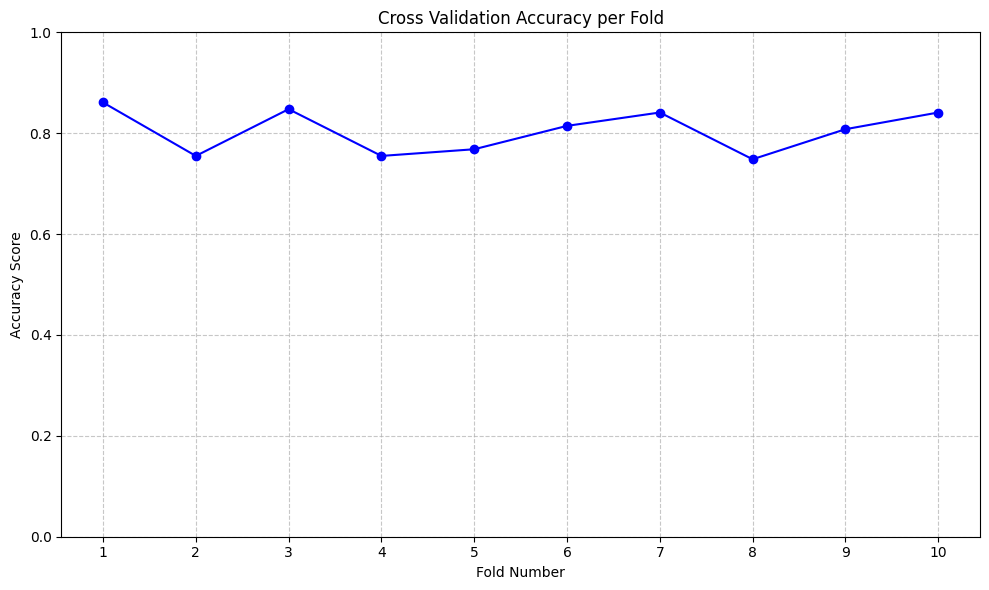

In [ ]:
# Lakukan cross validation menggunakan cross_val_score
cv_scores = cross_val_score(
    best_knn,
    X,
    y,
    cv=ShuffleSplit(n_splits=10, test_size=0.3, random_state=42),
    scoring="accuracy",
)

# Membuat array nomor fold (misalnya, [1, 2, 3, 4, 5])
fold_numbers = np.arange(1, len(cv_scores) + 1)

# Buat DataFrame untuk menyajikan hasil cross validation
df_cv = pd.DataFrame({"Fold": fold_numbers, "Accuracy": cv_scores})
print("Hasil Cross Validation:")
print(df_cv)

# Visualisasikan hasil cross validation menggunakan line plot
plt.figure(figsize=(10, 6))
plt.plot(fold_numbers, cv_scores, marker="o", linestyle="-", color="b")
plt.title("Cross Validation Accuracy per Fold")
plt.xlabel("Fold Number")
plt.ylabel("Accuracy Score")
plt.ylim(0, 1)
plt.xticks(fold_numbers)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


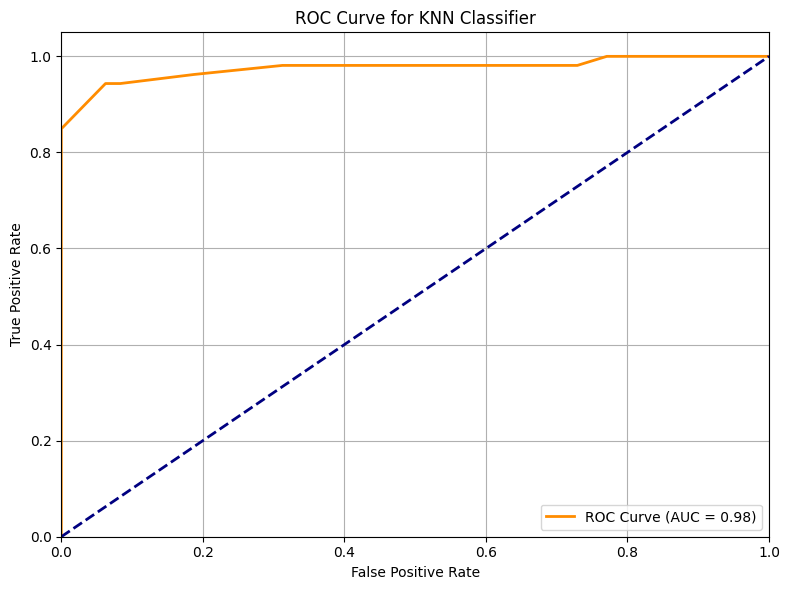

In [ ]:
# Prediksi probabilitas untuk kelas positif
y_proba = best_knn.predict_proba(X_test)[:, 1]

# Hitung ROC curve dan AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for KNN Classifier")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()
